# 1 Data Wrangling

## Imports

In [167]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
sns.set_theme(style="darkgrid")


## Data overview 

### train.csv
* The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* **store_nbr** identifies the store at which the products are sold.</br>
* **family** identifies the type of product sold.</br>
* **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).</br>
* **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.


In [95]:
df_train = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/train.csv',
                      index_col='id')

In [96]:
df_train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [97]:
df_train.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


___

### stores.csv
* Store metadata, including **city**, **state**, **type**, and **cluster**.
* **cluster** is a grouping of similar stores.

In [99]:
df_stores = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/stores.csv')

In [100]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [101]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


___

### oil.csv
* Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [102]:
df_oil = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/oil.csv')

In [103]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [104]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


___

### holidays_events.csv
* Holidays and Events, with metadata
* NOTE: Pay special attention to the **transferred** column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).


In [105]:
df_holiday = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/holidays_events.csv')

In [106]:
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [107]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


___

### transactions.csv


In [108]:
df_transactions = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/misc-data/store-sales-time-series-forecasting/transactions.csv')

In [109]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [110]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


___ 

### Additional Notes
* Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
* A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

___

## Data exploration



### Missing values

In [111]:
#checking missing values by column 
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage %','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [112]:
# missing values in df_train
percentageOfnull(df_train)

,Null Count,Null Percentage %,DataTypes


In [113]:
# missing values in df_holiday
percentageOfnull(df_holiday)

,Null Count,Null Percentage %,DataTypes


In [114]:
# missing values in df_oil
percentageOfnull(df_oil)

,Null Count,Null Percentage %,DataTypes
dcoilwtico,43,3.530378,float64


In [115]:
# missing values in df_stores
percentageOfnull(df_stores)

,Null Count,Null Percentage %,DataTypes


In [116]:
# missing values in df_transactions
percentageOfnull(df_transactions)

,Null Count,Null Percentage %,DataTypes


___

### df_train

In [117]:
df_train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [118]:
np.sort(df_train['store_nbr'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

We have 54 different stores in our training data.</br>
The following are the distinct categories each store sells:

In [119]:
np.sort(df_train['family'].unique())

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

For our forecasting purposes, first, we want to forecast the overall sales of all the Favorita stores to get an idea of the business quantity and profit the company should expect. Second, we want to forecast sales of items by category in each Favorita store. This forecast will help individual stores stock items by their expected demand. Doing so will help increase sales and decrease waste.

In [120]:
# converting 'date' into a DateTime object and setting it as the index
df_train['date'] = pd.to_datetime(df_train['date'])
df_train = df_train.set_index('date')

In [121]:
# creating a data frame for aggregated sales across all stores
all_stores = df_train.resample('D').sum(numeric_only=True)[['sales','onpromotion']]

In [122]:
all_stores

,sales,onpromotion
date,,
2013-01-01,2511.618999,0
2013-01-02,496092.417944,0
2013-01-03,361461.231124,0
2013-01-04,354459.677093,0
2013-01-05,477350.121229,0
...,...,...
2017-08-11,826373.722022,14179
2017-08-12,792630.535079,8312
2017-08-13,865639.677471,9283


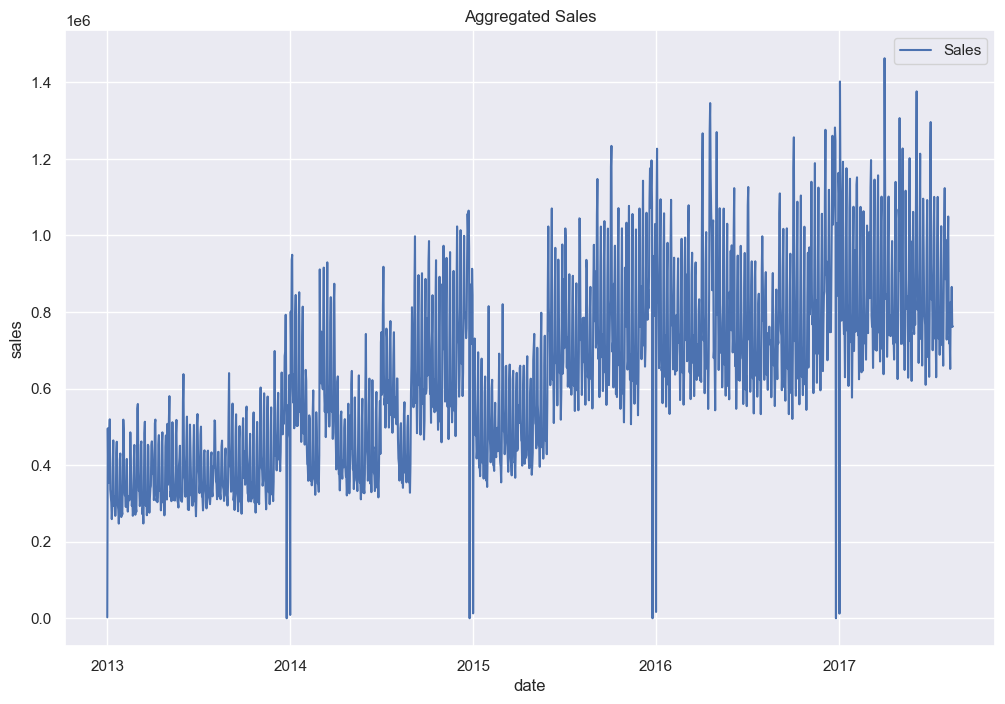

In [207]:
plt.figure(figsize=(12,8))
plt.title('Aggregated Sales')
sns.lineplot(x = all_stores.index, y = 'sales', data = all_stores, label = 'Sales', legend = True);

___

### df_stores

In [125]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [126]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [127]:
df_stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [128]:
df_stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [129]:
df_stores.type.unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [130]:
df_stores.cluster.unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

___

### df_oil

In [131]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [132]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil= df_oil.set_index('date')
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


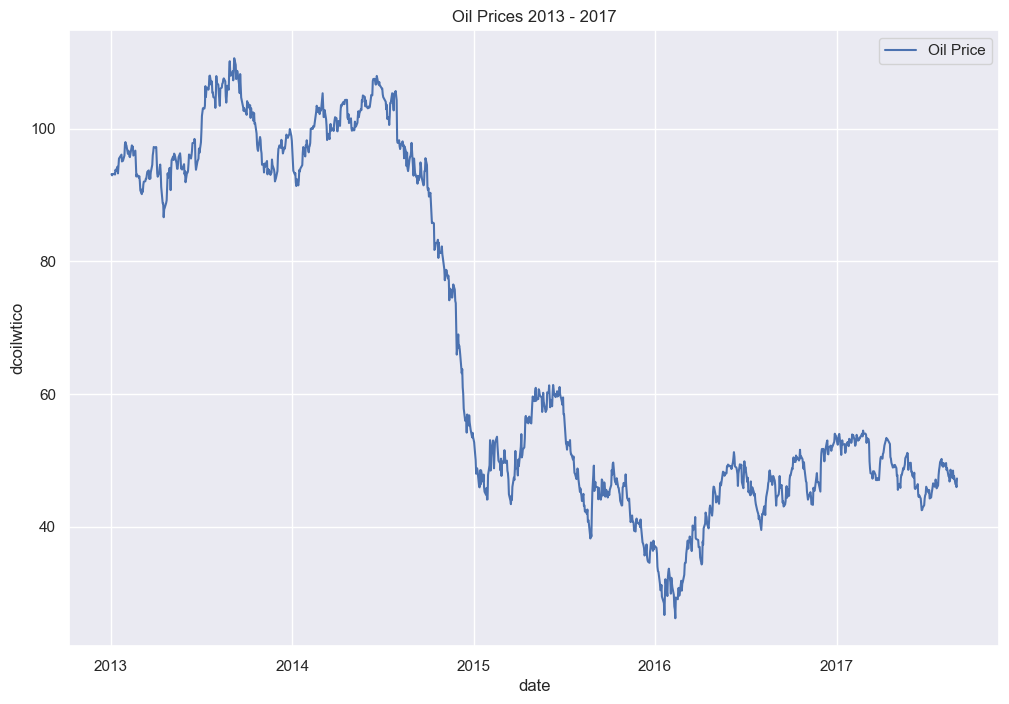

In [209]:
plt.figure(figsize=(12,8))
plt.title('Oil Prices 2013 - 2017')
sns.lineplot(x = df_oil.index, y = 'dcoilwtico', data = df_oil,label = 'Oil Price', legend=True);

___

### df_holidays

In [134]:
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [140]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [139]:
df_holiday['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [146]:
df_closed = df_holiday[df_holiday['transferred']==False]
df_closed = df_closed [['date','locale_name']]
df_closed['date'] = pd.to_datetime(df_closed['date'])
df_closed = df_closed.set_index('date')
df_closed.head()

,locale_name
date,
2012-03-02,Manta
2012-04-01,Cotopaxi
2012-04-12,Cuenca
2012-04-14,Libertad
2012-04-21,Riobamba


In [147]:
df_closed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2012-03-02 to 2017-12-26
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   locale_name  338 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [149]:
df_closed['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

___

## Creating Dataframes for EDA

### df_agg_sales

In [210]:
df_agg_sales = df_train[['sales']].resample('D').sum()
df_agg_sales.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [211]:
df_agg_sales.to_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/agg_sales.csv')

### df_sorted_total_sales_by_store

In [212]:
df_stores['store_nbr'] = df_stores['store_nbr'].astype(str)
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [213]:
sorted_total_sales_by_store = df_train.groupby('store_nbr').sum(numeric_only=True).reset_index()
sorted_total_sales_by_store.head()

,store_nbr,sales,onpromotion
0,1,1.414501e+07,138020
1,2,2.155739e+07,158149
2,3,5.048191e+07,177075
3,4,1.890970e+07,151932
4,5,1.559240e+07,149370


In [214]:
sorted_total_sales_by_store['city'] = df_stores['city']
sorted_total_sales_by_store.head()

,store_nbr,sales,onpromotion,city
0,1,1.414501e+07,138020,Quito
1,2,2.155739e+07,158149,Quito
2,3,5.048191e+07,177075,Quito
3,4,1.890970e+07,151932,Quito
4,5,1.559240e+07,149370,Santo Domingo


In [215]:
sorted_total_sales_by_store = sorted_total_sales_by_store.sort_values(by = 'sales', ascending=False)

In [216]:
sorted_total_sales_by_store['store_nbr'] = sorted_total_sales_by_store['store_nbr'].astype(str)

In [217]:
sorted_total_sales_by_store.to_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/sorted_total_sales_by_store.csv')

### df_agg_month

In [219]:
df_agg_month = df_agg_sales.resample('m').sum()
df_agg_month = df_agg_month.reset_index()
df_agg_month['month'] = df_agg_month['date'].dt.month
df_agg_month['date'] = pd.to_datetime(df_agg_month['date'])
df_agg_month['year'] = df_agg_month['date'].dt.year
df_agg_month = df_agg_month.set_index('date')
df_agg_month.head()

,sales,month,year
date,,,
2013-01-31,1.032762e+07,1,2013
2013-02-28,9.658960e+06,2,2013
2013-03-31,1.142850e+07,3,2013
2013-04-30,1.099346e+07,4,2013
2013-05-31,1.159770e+07,5,2013


In [220]:
df_agg_month.to_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_agg_month.csv')

### df_agg_quart

In [221]:
df_agg_quart = df_agg_sales.resample('Q').sum(numeric_only=True)
df_agg_quart['Q'] = [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3]

In [222]:
df_agg_quart.to_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_agg_quart.csv')

### df_ecuador

In [223]:
df_inflation = pd.read_excel('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/raw-data/API_FP.CPI.TOTL_DS2_en_csv_v2_5358379/API_FP.CPI.TOTL_DS2_en_excel_v2_5359001.xls', header=None)

In [224]:
df_inflation.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,Data Source,World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2023-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0
4,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,104.970853,102.480876,102.912772,103.401365,102.438495,101.385139,105.061406,109.534355,NaN,NaN


In [225]:
df_inflation = df_inflation.drop(index = [0,1,2], axis = 0)
df_inflation.columns = df_inflation.iloc[0]
df_inflation.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0
4,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,104.970853,102.480876,102.912772,103.401365,102.438495,101.385139,105.061406,109.534355,NaN,NaN
5,Africa Eastern and Southern,AFE,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,119.005731,127.795223,133.768367,132.883209,138.708666,145.610741,146.522482,149.895975,NaN,NaN
7,Africa Western and Central,AFW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
df_ecuador = df_inflation[df_inflation['Country Name'] == 'Ecuador']
df_ecuador = df_ecuador.drop(columns = ['Country Name', 'Country Code','Indicator Name','Indicator Code'], axis = 1)
df_ecuador = df_ecuador.T
df_ecuador = df_ecuador.reset_index()
df_ecuador.columns = ['year', 'CPI']
df_ecuador['year'] = df_ecuador['year'].astype(int)
df_ecuador['year'] = pd.to_datetime(df_ecuador['year'],format='%Y')
df_ecuador = df_ecuador.set_index('year')

df_ecuador.head()

,CPI
year,
1960-01-01,0.011759
1961-01-01,0.012228
1962-01-01,0.012579
1963-01-01,0.013326
1964-01-01,0.013863


In [227]:
df_ecuador.to_csv('/Users/hamzaalbustanji/Documents/GitHub/Favorita-Sales-Forecast/data/df_ecuador.csv')

___